# Assignment 3

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Question 1: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [2]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)

_(i)_ Create an `alpha_func(D, idx)` function which takes the `Sepal`'s `width` and `length` to calculate for alpha

In [3]:
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [33]:
# defining an alpha function which by default calculates alpha over an index vector of 100 elements
# assume there are columns in D named 'Sepal.Length' and 'Sepal.Width'
# return alpha over all 100 samples
# code referenced from DSI/applying_statistical_concepts/03_exercises/9_the_bootstrap_exercise.ipynb

def alpha_func(D, idx=range(100)):
   cov_ = np.cov(D[['Sepal.Length','Sepal.Width']].loc[idx], rowvar=False)
   return ((cov_[1,1] - cov_[0,1]) /
           (cov_[0,0]+cov_[1,1]-2*cov_[0,1]))

Test the code below

In [5]:
alpha_func(df, range(100))

0.38105014898343803

_(ii)_ Construct a new bootstrap data set and recompute alpha

In [6]:
rng = np.random.default_rng(0)
alpha_func(df,
           rng.choice(100,
                      100,
                      replace=True))

0.3324645134841774

Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the dataset is `Sepal.Length`. 

_(iii)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Sepal.Length`? What more information will preforming a bootstrap provide to us?  
> We are missing information about the error of the mean we calculated. Using bootstrap we can put a standard deviation to the mean we provided to help define the neighbourhood we can trust.

_(iv)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

In [7]:
# commented because the below was implemented as a function which takes seed as an input 
#rng = np.random.default_rng(0)



_(v)_ Evaluate the accuracy of our alpha estimate with B = 1000

In [34]:
# code referenced from DSI/applying_statistical_concepts/03_exercises/9_the_bootstrap_exercise.ipynb
import warnings
def boot_SE(func,
            D,
            n=None,
            B=1000,
            seed=0):
    # NOTE: Suppress FutureWarning in ISLP.models.columns
    # The warning is related to Series.__getitem__ treating keys as positions, which is deprecated.
    # Since ISLP is an external library that I don't control, and this specific warning does not
    # affect my current usage, I'm suppressing it to keep the output clean and focused on relevant information.
    warnings.filterwarnings(action='ignore', category=FutureWarning, module='ISLP.models.columns', lineno=151)
    
    rng = np.random.default_rng(seed)
    first_, second_ = 0, 0
    n = n or D.shape[0]
    for _ in range(B):
        idx = rng.choice(D.index,
                         n,
                         replace=True)
        value = func(D, idx)
        first_ += value
        second_ += value**2
    return np.sqrt(second_ / B - (first_ / B)**2)

def avg_petal_len(D,idx):
    return np.mean(df.loc[idx, 'Sepal.Length'])

print('By bootstrap, the standard error of the mean petal length in cm is',
     boot_SE(func=avg_petal_len,D=df,n=None,B=1000,seed=0))

By bootstrap, the standard error of the mean petal length in cm is 0.06649295592135049


_(vi)_ What is the original mean value of `Sepal.Length`?

In [36]:
print('(vi) the original mean of Sepal.Length in cm is')
np.mean(df['Sepal.Length'])

(vi) the original mean of Sepal.Length in cm is


5.843333333333334

Next, let's look _inside_ our bootstrapping to understand the new, bootstrapped sample we have created. Let's review the bootstrapped range, by using `t_range = np.ptp(boot_se_samples)`.

_(vii)_. Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value.

In [10]:
#code referenced from above cell but modified to append an array with results of func and then return the array
def boot_SE_samples(func,
            D,
            n=None,
            B=1000,
            seed=0):
    # NOTE: Suppress FutureWarning in ISLP.models.columns
    # The warning is related to Series.__getitem__ treating keys as positions, which is deprecated.
    # Since ISLP is an external library that I don't control, and this specific warning does not
    # affect my current usage, I'm suppressing it to keep the output clean and focused on relevant information.
    warnings.filterwarnings(action='ignore', category=FutureWarning, module='ISLP.models.columns', lineno=151)
    
    rng = np.random.default_rng(seed)
    first_, second_ = 0, 0
    n = n or D.shape[0]
    bsamples = []
    for _ in range(B):
        idx = rng.choice(D.index,
                         n,
                         replace=True)
        #value = func(D, idx)
        #first_ += value
        #second_ += value**2
        bsamples.append(func(D, idx))
    return bsamples

#boot_SE_samples(func=avg_petal_len,D=df,n=None,B=1000,seed=0)
samples = boot_SE_samples(func=avg_petal_len,D=df,n=None,B=1000,seed=0)
t_range = np.ptp(samples)
print('(vi) our bootstrap samples had a range of means of `Sepal.Length` spread over an interval of length')
print(t_range)

(vi) our bootstrap samples had a range of means of `Sepal.Length` spread over an interval of length
0.3873333333333342


In [11]:
# review the bootstrapped mean value, and 
# the standard deviation of the bootstrapped samples

print('(vii) from the boot strapped samples we find the mean is')
print(np.mean(samples), 'compared to the original mean', df['Sepal.Length'].mean())
print('')
print('The standard deviation of the samples is')
print(np.std(samples), 'compared to bootstrap standard error',  boot_SE(func=avg_petal_len,D=df,n=None,B=1000,seed=0))

(vii) from the boot strapped samples we find the mean is
5.842284666666666 compared to the original mean 5.843333333333334

The standard deviation of the samples is
0.06649295592099295 compared to bootstrap standard error 0.06649295592135049


_(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris petal length. (Hint: use the `np.percentile` function)

In [12]:
print('(viii) the 5 to 95 confidence interval of the bootstrapped samples was')
print(np.percentile(samples,[5,95]))
print('this signifies a spread of',np.percentile(samples,95)-np.percentile(samples,5),"compared to the peak to peak range we found earlier:",t_range)

(viii) the 5 to 95 confidence interval of the bootstrapped samples was
[5.73466667 5.9587    ]
this signifies a spread of 0.22403333333333375 compared to the peak to peak range we found earlier: 0.3873333333333342


_(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ?

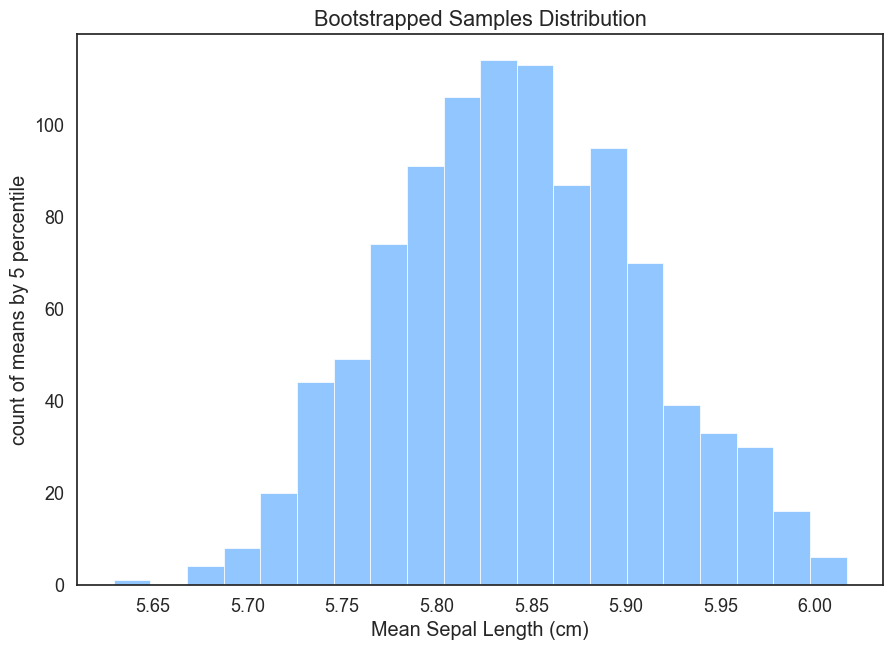

In [32]:
#(ix)

# Create a figure and axis
plt.style.use('seaborn-v0_8-white')
fig, ax = plt.subplots()

# Create the histogram
ax.hist(samples, bins=20, density = False, linewidth=0.5, edgecolor="white")

# Add a title
ax.set_title('Bootstrapped Samples Distribution')
# Add a label to the x-axis
ax.set_xlabel('Mean Sepal Length (cm)')

# Add a label to the y-axis
ax.set_ylabel('count of means by 5 percentile')

# Show the plot
plt.show()



_(x)_ Given your bootstrapped analysis, what do you recommend to shipping company? 

>(x) the majority of flowers will have Sepal length between 5.7 and 6cm, ensuring adequate space during transportation so as to not damage the could require between 12 aand 18cm between pots of 1 flower Iris's

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Bootstrapping|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.


### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applied_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
